In [1]:
!pip3 install scikit-learn
!pip3 install matplotlib
!pip3 install pandas
!pip3 install numpy
!pip3 install seaborn
!pip install scikit-image
!pip install tensorflow

     |████████████████████████████████| 10.5 MB 3.7 MB/s eta 0:00:01
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
  Using cached numpy-1.26.4-cp39-cp39-macosx_11_0_arm64.whl (14.0 MB)
  Using cached scipy-1.12.0-cp39-cp39-macosx_12_0_arm64.whl (31.4 MB)
You should consider upgrading via the '/Users/sathya/Desktop/ComputationForDS/CDS/bin/python3 -m pip install --upgrade pip' command.
     |████████████████████████████████| 7.5 MB 2.7 MB/s eta 0:00:01
  Using cached pillow-10.2.0-cp39-cp39-macosx_11_0_arm64.whl (3.3 MB)
     |████████████████████████████████| 2.8 MB 5.3 MB/s eta 0:00:01
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached importlib_resources-6.1.1-py3-none-any.whl (33 kB)
  Using cached kiwisolver-1.4.5-cp39-cp39-macosx_11_0_arm64.whl (66 kB)
  Using cached pyparsing-3.1.1-py3-none-any.whl (103 kB)
  Using cached contourpy-1.2.0-cp39-cp39-macosx_11_0_arm64.whl (242 kB)
You should consider upgrading via the '/Users/sathya/Desktop/ComputationForD

In [2]:
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

/var/folders/x6/sc1l9n8n0p1g5x042tlggs6h0000gn/T/ipykernel_14697/2563206069.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
import seaborn as sns

# Objective of the assignment 
Is to implement the classic Machine learning algorithms of classification, clustering, regression, dimension reduction, and ensembles 

This is to be done on any one of the corgis dataset ; for this I have taken the airlines dataset
First I will be reporting the findings of the visual analysis of the data on an Excel spreadsheet 
And then I will be doing whatever changes needs to be done, here, using python
First I will be loading the dataset on here so that i can also analyze it using Python 

In [9]:
df = pd.read_csv('/Users/sathya/Desktop/ComputationForDS/HW2/airlines.csv')
df

,Airport.Code,Airport.Name,Time.Label,Time.Month,Time.Month Name,Time.Year,Statistics.# of Delays.Carrier,Statistics.# of Delays.Late Aircraft,Statistics.# of Delays.National Aviation System,Statistics.# of Delays.Security,...,Statistics.Flights.Delayed,Statistics.Flights.Diverted,Statistics.Flights.On Time,Statistics.Flights.Total,Statistics.Minutes Delayed.Carrier,Statistics.Minutes Delayed.Late Aircraft,Statistics.Minutes Delayed.National Aviation System,Statistics.Minutes Delayed.Security,Statistics.Minutes Delayed.Total,Statistics.Minutes Delayed.Weather
0,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2003/06,6,June,2003,1009,1275,3217,17,...,5843,27,23974,30060,61606,68335,118831,518,268764,19474
1,BOS,"Boston, MA: Logan International",2003/06,6,June,2003,374,495,685,3,...,1623,3,7875,9639,20319,28189,24400,99,77167,4160
2,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",2003/06,6,June,2003,296,477,389,8,...,1245,15,6998,8287,13635,26810,17556,278,64480,6201
3,CLT,"Charlotte, NC: Charlotte Douglas International",2003/06,6,June,2003,300,472,735,2,...,1562,14,7021,8670,14763,23379,23804,127,65865,3792
4,DCA,"Washington, DC: Ronald Reagan Washington National",2003/06,6,June,2003,283,268,487,4,...,1100,18,5321,6513,13775,13712,20999,120,52747,4141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4403,SAN,"San Diego, CA: San Diego International",2016/01,1,January,2016,280,397,171,2,...,871,18,5030,6016,15482,23023,6021,79,46206,1601
4404,SEA,"Seattle, WA: Seattle/Tacoma International",2016/01,1,January,2016,357,513,351,2,...,1274,31,8330,9739,25461,32693,11466,73,74017,4324
4405,SFO,"San Francisco, CA: San Francisco International",2016/01,1,January,2016,560,947,2194,2,...,3825,20,8912,13206,43641,72557,153416,66,278610,8930
4406,SLC,"Salt Lake City, UT: Salt Lake City International",2016/01,1,January,2016,338,540,253,3,...,1175,14,7426,8699,32066,33682,8057,57,76978,3116


In [7]:
print(df.columns)

Index(['Airport.Code', 'Airport.Name', 'Time.Label', 'Time.Month',
       'Time.Month Name', 'Time.Year', 'Statistics.# of Delays.Carrier',
       'Statistics.# of Delays.Late Aircraft',
       'Statistics.# of Delays.National Aviation System',
       'Statistics.# of Delays.Security', 'Statistics.# of Delays.Weather',
       'Statistics.Carriers.Names', 'Statistics.Carriers.Total',
       'Statistics.Flights.Cancelled', 'Statistics.Flights.Delayed',
       'Statistics.Flights.Diverted', 'Statistics.Flights.On Time',
       'Statistics.Flights.Total', 'Statistics.Minutes Delayed.Carrier',
       'Statistics.Minutes Delayed.Late Aircraft',
       'Statistics.Minutes Delayed.National Aviation System',
       'Statistics.Minutes Delayed.Security',
       'Statistics.Minutes Delayed.Total',
       'Statistics.Minutes Delayed.Weather'],
      dtype='object')


In [ ]:
# Since Time.label is enough to give us all the info needed regarding the time of the stat, we can get rid of the other 3 
# and airport code is enough to ID airport (Atleast for a flight enthusiast like myself) getting rid of that too 
df.drop(columns=['Time.Month', 'Time.Month Name','Time.Year' ], inplace=True)

In [15]:
# and airport code is enough to ID airport (Atleast for a flight enthusiast like myself) getting rid of that too '
df.drop(columns=['Airport.Name'],inplace=True)

In [16]:
df

,Airport.Code,Time.Label,Statistics.# of Delays.Carrier,Statistics.# of Delays.Late Aircraft,Statistics.# of Delays.National Aviation System,Statistics.# of Delays.Security,Statistics.# of Delays.Weather,Statistics.Carriers.Names,Statistics.Carriers.Total,Statistics.Flights.Cancelled,Statistics.Flights.Delayed,Statistics.Flights.Diverted,Statistics.Flights.On Time,Statistics.Flights.Total,Statistics.Minutes Delayed.Carrier,Statistics.Minutes Delayed.Late Aircraft,Statistics.Minutes Delayed.National Aviation System,Statistics.Minutes Delayed.Security,Statistics.Minutes Delayed.Total,Statistics.Minutes Delayed.Weather
0,ATL,2003/06,1009,1275,3217,17,328,"American Airlines Inc.,JetBlue Airways,Contine...",11,216,5843,27,23974,30060,61606,68335,118831,518,268764,19474
1,BOS,2003/06,374,495,685,3,66,"American Airlines Inc.,Alaska Airlines Inc.,Co...",14,138,1623,3,7875,9639,20319,28189,24400,99,77167,4160
2,BWI,2003/06,296,477,389,8,78,"American Airlines Inc.,Continental Air Lines I...",11,29,1245,15,6998,8287,13635,26810,17556,278,64480,6201
3,CLT,2003/06,300,472,735,2,54,"American Airlines Inc.,Continental Air Lines I...",11,73,1562,14,7021,8670,14763,23379,23804,127,65865,3792
4,DCA,2003/06,283,268,487,4,58,"American Airlines Inc.,Alaska Airlines Inc.,Co...",13,74,1100,18,5321,6513,13775,13712,20999,120,52747,4141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4403,SAN,2016/01,280,397,171,2,20,"American Airlines Inc.,Alaska Airlines Inc.,Je...",11,97,871,18,5030,6016,15482,23023,6021,79,46206,1601
4404,SEA,2016/01,357,513,351,2,50,"American Airlines Inc.,Alaska Airlines Inc.,Je...",10,104,1274,31,8330,9739,25461,32693,11466,73,74017,4324
4405,SFO,2016/01,560,947,2194,2,119,"American Airlines Inc.,Alaska Airlines Inc.,Je...",10,449,3825,20,8912,13206,43641,72557,153416,66,278610,8930
4406,SLC,2016/01,338,540,253,3,38,"American Airlines Inc.,Alaska Airlines Inc.,Je...",8,84,1175,14,7426,8699,32066,33682,8057,57,76978,3116


In [17]:
print(df.columns)

Index(['Airport.Code', 'Time.Label', 'Statistics.# of Delays.Carrier',
       'Statistics.# of Delays.Late Aircraft',
       'Statistics.# of Delays.National Aviation System',
       'Statistics.# of Delays.Security', 'Statistics.# of Delays.Weather',
       'Statistics.Carriers.Names', 'Statistics.Carriers.Total',
       'Statistics.Flights.Cancelled', 'Statistics.Flights.Delayed',
       'Statistics.Flights.Diverted', 'Statistics.Flights.On Time',
       'Statistics.Flights.Total', 'Statistics.Minutes Delayed.Carrier',
       'Statistics.Minutes Delayed.Late Aircraft',
       'Statistics.Minutes Delayed.National Aviation System',
       'Statistics.Minutes Delayed.Security',
       'Statistics.Minutes Delayed.Total',
       'Statistics.Minutes Delayed.Weather'],
      dtype='object')


## Sidebar 
So here's what i'm  gonna do, as of now , i have just started out with the data and do not really know what i can do with it 
So im gonna perform a small EDA, and see what i exactly have and what i can do, and then i will be getting to the actual objective of the homework 
Ill be honest here , i asked chatgpt what i should do and one of its suggestions was this 


Explore Overall Flight Delay Patterns:
Calculate the total number of flights, delayed flights, cancelled flights, and diverted flights for each time period (e.g., month or year) using the relevant columns (Statistics.Flights.Total, Statistics.Flights.Delayed, Statistics.Flights.Cancelled, Statistics.Flights.Diverted).
Visualize these metrics over time (e.g., monthly or yearly) using line plots or bar charts to identify any seasonal trends or patterns.

In [37]:
df['Time.Label'] = pd.to_datetime(df['Time.Label'], format='%Y/%m')
df

,Airport.Code,Time.Label,Statistics.# of Delays.Carrier,Statistics.# of Delays.Late Aircraft,Statistics.# of Delays.National Aviation System,Statistics.# of Delays.Security,Statistics.# of Delays.Weather,Statistics.Carriers.Names,Statistics.Carriers.Total,Statistics.Flights.Cancelled,Statistics.Flights.Delayed,Statistics.Flights.Diverted,Statistics.Flights.On Time,Statistics.Flights.Total,Statistics.Minutes Delayed.Carrier,Statistics.Minutes Delayed.Late Aircraft,Statistics.Minutes Delayed.National Aviation System,Statistics.Minutes Delayed.Security,Statistics.Minutes Delayed.Total,Statistics.Minutes Delayed.Weather
0,ATL,2003-06-01,1009,1275,3217,17,328,"American Airlines Inc.,JetBlue Airways,Contine...",11,216,5843,27,23974,30060,61606,68335,118831,518,268764,19474
1,BOS,2003-06-01,374,495,685,3,66,"American Airlines Inc.,Alaska Airlines Inc.,Co...",14,138,1623,3,7875,9639,20319,28189,24400,99,77167,4160
2,BWI,2003-06-01,296,477,389,8,78,"American Airlines Inc.,Continental Air Lines I...",11,29,1245,15,6998,8287,13635,26810,17556,278,64480,6201
3,CLT,2003-06-01,300,472,735,2,54,"American Airlines Inc.,Continental Air Lines I...",11,73,1562,14,7021,8670,14763,23379,23804,127,65865,3792
4,DCA,2003-06-01,283,268,487,4,58,"American Airlines Inc.,Alaska Airlines Inc.,Co...",13,74,1100,18,5321,6513,13775,13712,20999,120,52747,4141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4403,SAN,2016-01-01,280,397,171,2,20,"American Airlines Inc.,Alaska Airlines Inc.,Je...",11,97,871,18,5030,6016,15482,23023,6021,79,46206,1601
4404,SEA,2016-01-01,357,513,351,2,50,"American Airlines Inc.,Alaska Airlines Inc.,Je...",10,104,1274,31,8330,9739,25461,32693,11466,73,74017,4324
4405,SFO,2016-01-01,560,947,2194,2,119,"American Airlines Inc.,Alaska Airlines Inc.,Je...",10,449,3825,20,8912,13206,43641,72557,153416,66,278610,8930
4406,SLC,2016-01-01,338,540,253,3,38,"American Airlines Inc.,Alaska Airlines Inc.,Je...",8,84,1175,14,7426,8699,32066,33682,8057,57,76978,3116


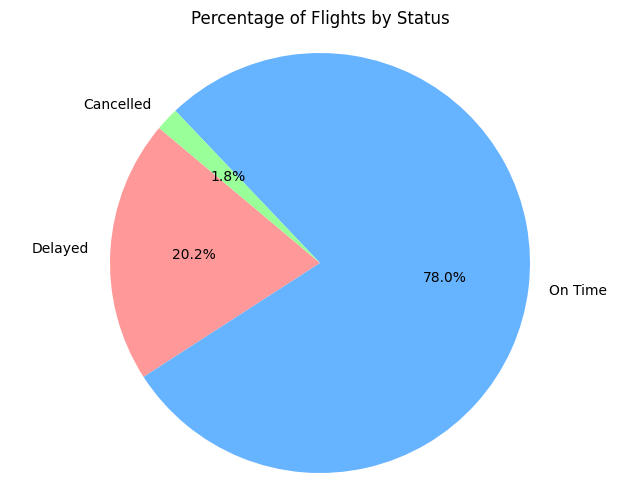

In [58]:
# Calculate the total number of flights for each status
total_flights = df['Statistics.Flights.Total'].sum()
total_delayed_flights = df['Statistics.Flights.Delayed'].sum()
total_on_time_flights = df['Statistics.Flights.On Time'].sum()
total_cancelled_flights = df['Statistics.Flights.Cancelled'].sum()

# Calculate the percentage of flights for each status
percent_delayed = (total_delayed_flights / total_flights) * 100
percent_on_time = (total_on_time_flights / total_flights) * 100
percent_cancelled = (total_cancelled_flights / total_flights) * 100

# Plot the percentages as a pie chart
labels = ['Delayed', 'On Time', 'Cancelled']
sizes = [percent_delayed, percent_on_time, percent_cancelled]
colors = ['#ff9999','#66b3ff','#99ff99']
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Flights by Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [40]:
grouped_df_x = df.groupby(pd.Grouper(key='Time.Label', freq='M')).agg({
    'Statistics.Flights.Total': 'sum',
    'Statistics.Flights.Delayed': 'sum',
    'Statistics.Flights.Cancelled': 'sum',
    'Statistics.Flights.Diverted': 'sum'
}).reset_index()

df_grouped = df.groupby(pd.Grouper(key='Time.Label', freq='M')).first().reset_index()

/var/folders/x6/sc1l9n8n0p1g5x042tlggs6h0000gn/T/ipykernel_14697/3792097253.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  grouped_df_x = df.groupby(pd.Grouper(key='Time.Label', freq='M')).agg({
/var/folders/x6/sc1l9n8n0p1g5x042tlggs6h0000gn/T/ipykernel_14697/3792097253.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_grouped = df.groupby(pd.Grouper(key='Time.Label', freq='M')).first().reset_index()


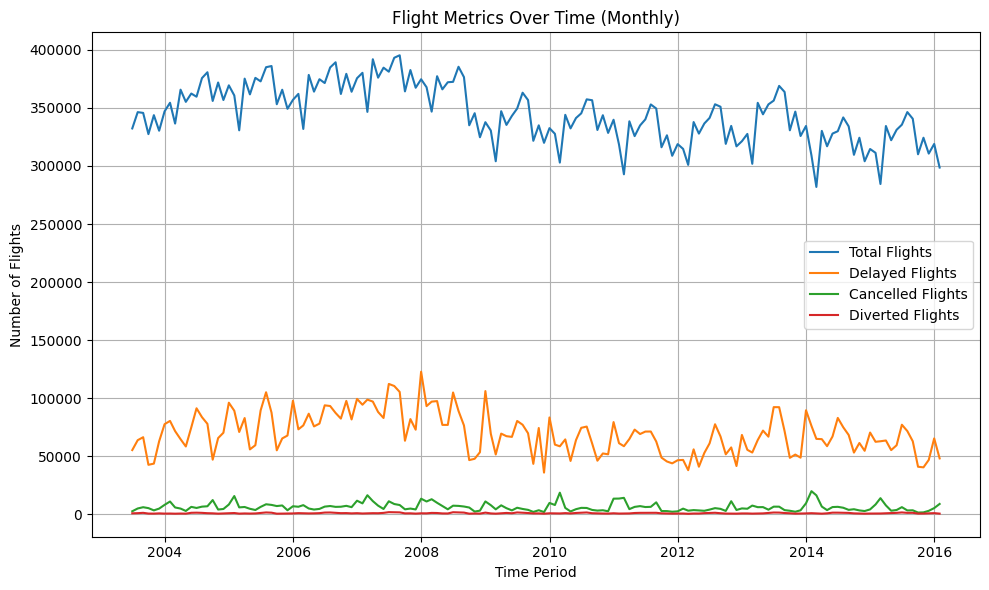

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['Time.Label'], grouped_df_x['Statistics.Flights.Total'], label='Total Flights')
plt.plot(df_grouped['Time.Label'], grouped_df_x['Statistics.Flights.Delayed'], label='Delayed Flights')
plt.plot(df_grouped['Time.Label'], grouped_df_x['Statistics.Flights.Cancelled'], label='Cancelled Flights')
plt.plot(df_grouped['Time.Label'], grouped_df_x['Statistics.Flights.Diverted'], label='Diverted Flights')


plt.xlabel('Time Period')
plt.ylabel('Number of Flights')
plt.title('Flight Metrics Over Time (Monthly)')


plt.legend()


plt.grid(True)
plt.tight_layout()
plt.show()

I am not able to infer much about the cancelled and diverted flights in this plot as they are very less compared to the other parameters, so im separating them for another plot 

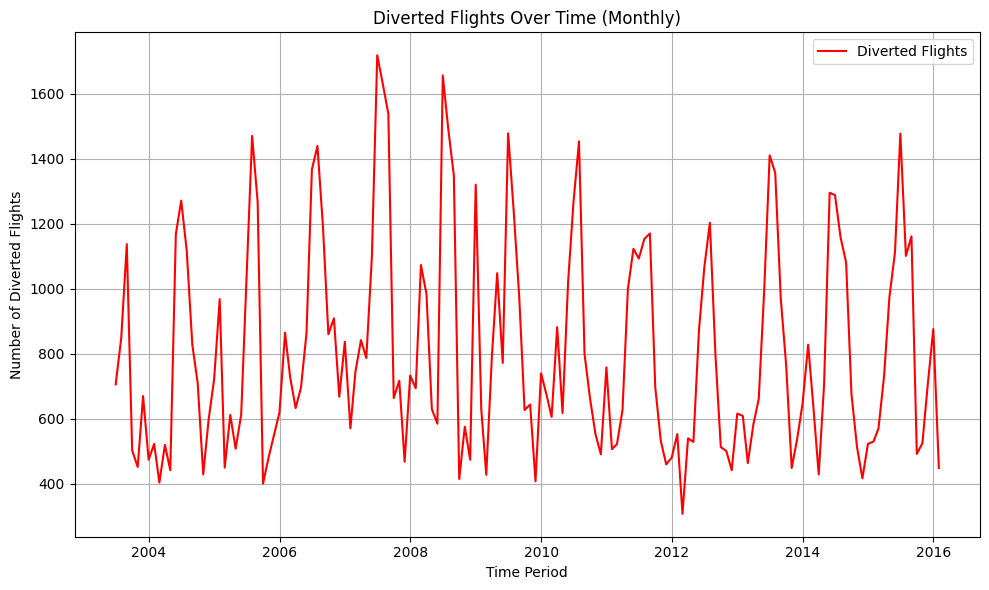

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(grouped_df_x['Time.Label'], grouped_df_x['Statistics.Flights.Diverted'], label='Diverted Flights', color='red')


plt.xlabel('Time Period')
plt.ylabel('Number of Diverted Flights')
plt.title('Diverted Flights Over Time (Monthly)')


plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

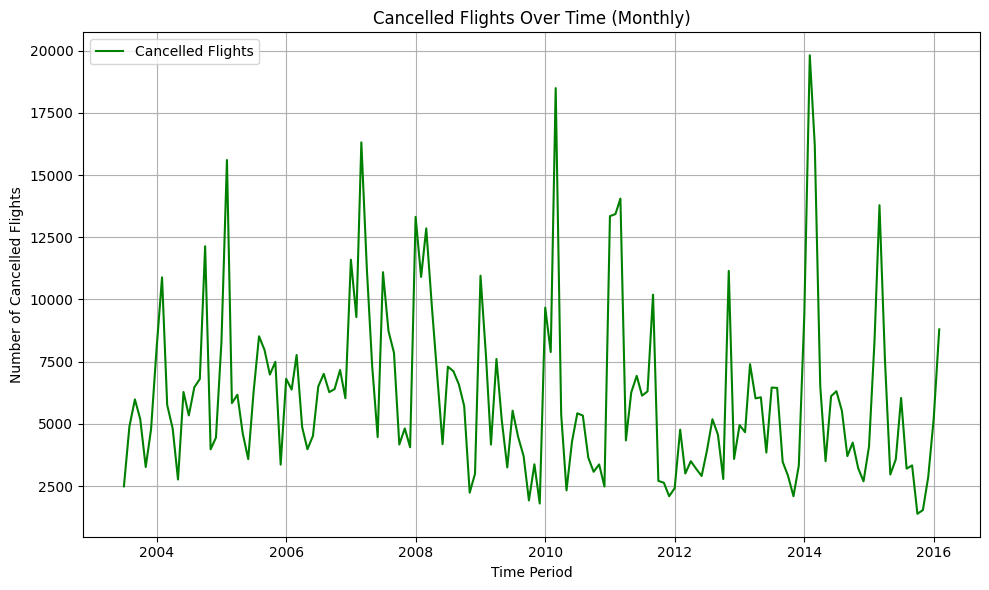

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(grouped_df_x['Time.Label'], grouped_df_x['Statistics.Flights.Cancelled'], label='Cancelled Flights', color='green')

# Add labels and title
plt.xlabel('Time Period')
plt.ylabel('Number of Cancelled Flights')
plt.title('Cancelled Flights Over Time (Monthly)')

# Show the legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

Interesting observation we can make here is how, during the holiday season the number of total flights shoots up and then plummets once it reaches feb 

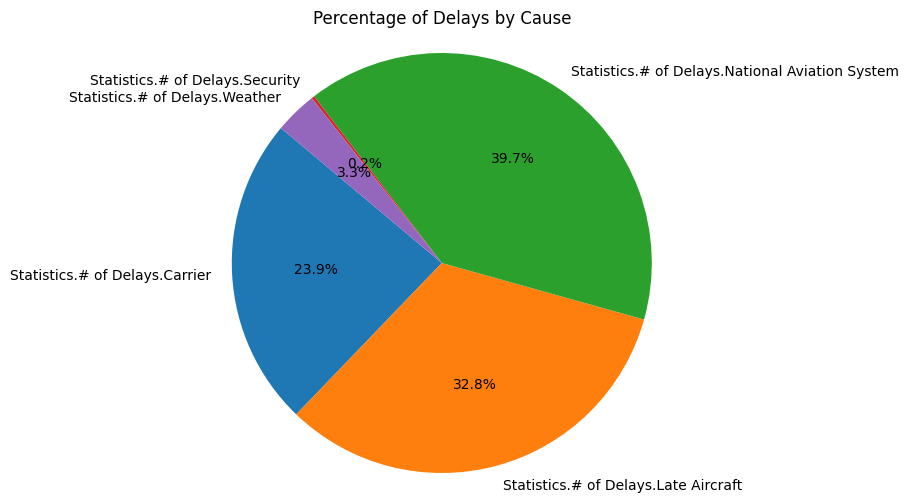

In [44]:
# Now analyzing the delay causes 
delay_causes = ['Statistics.# of Delays.Carrier', 
                'Statistics.# of Delays.Late Aircraft', 
                'Statistics.# of Delays.National Aviation System', 
                'Statistics.# of Delays.Security', 
                'Statistics.# of Delays.Weather']

total_delays = df[delay_causes].sum()

# Calculate the total number of delays across all causes
total_delay_count = total_delays.sum()

# Calculate the percentage of delays for each cause
delay_percentages = (total_delays / total_delay_count) * 100

# Visualize the delay causes using a pie chart
plt.figure(figsize=(8, 6))
plt.pie(delay_percentages, labels=delay_percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Delays by Cause')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


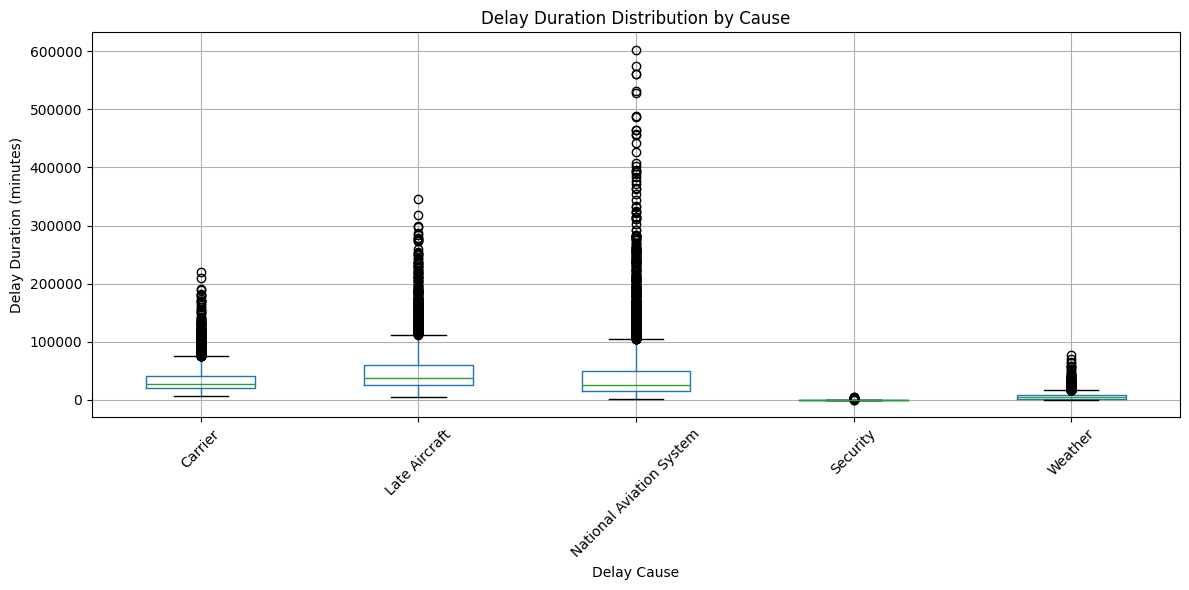

In [49]:
delay_duration_columns = ['Statistics.Minutes Delayed.Carrier', 
                          'Statistics.Minutes Delayed.Late Aircraft', 
                          'Statistics.Minutes Delayed.National Aviation System', 
                          'Statistics.Minutes Delayed.Security', 
                          'Statistics.Minutes Delayed.Weather']

# Calculate average and total delay duration for each delay cause
delay_df = df[delay_duration_columns]

# Plot box plots for delay duration distribution
plt.figure(figsize=(12, 6))
delay_df.boxplot(rot=45)
plt.title('Delay Duration Distribution by Cause')
plt.ylabel('Delay Duration (minutes)')
plt.xlabel('Delay Cause')
plt.xticks(range(1, len(delay_duration_columns) + 1), [col.split('.')[-1] for col in delay_duration_columns])
plt.tight_layout()
plt.show()

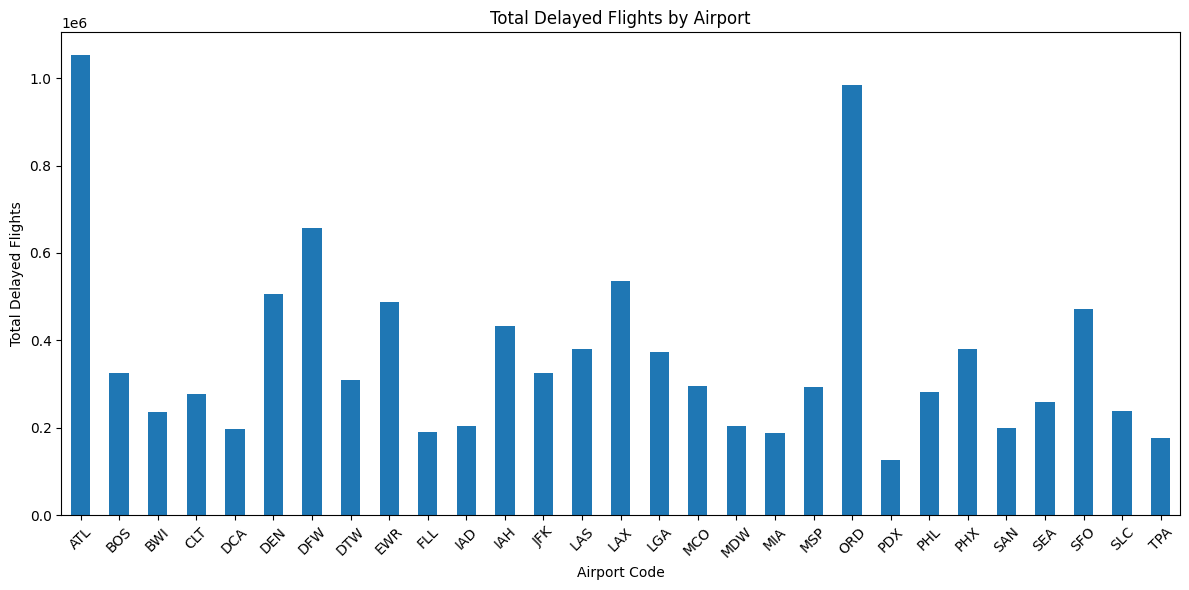

In [50]:
delayed_flights_by_airport = df.groupby('Airport.Code')['Statistics.Flights.Delayed'].sum()

# Plot bar plot
plt.figure(figsize=(12, 6))
delayed_flights_by_airport.plot(kind='bar')
plt.xlabel('Airport Code')
plt.ylabel('Total Delayed Flights')
plt.title('Total Delayed Flights by Airport')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Now if we wanted statistic singled out to a specific airport 

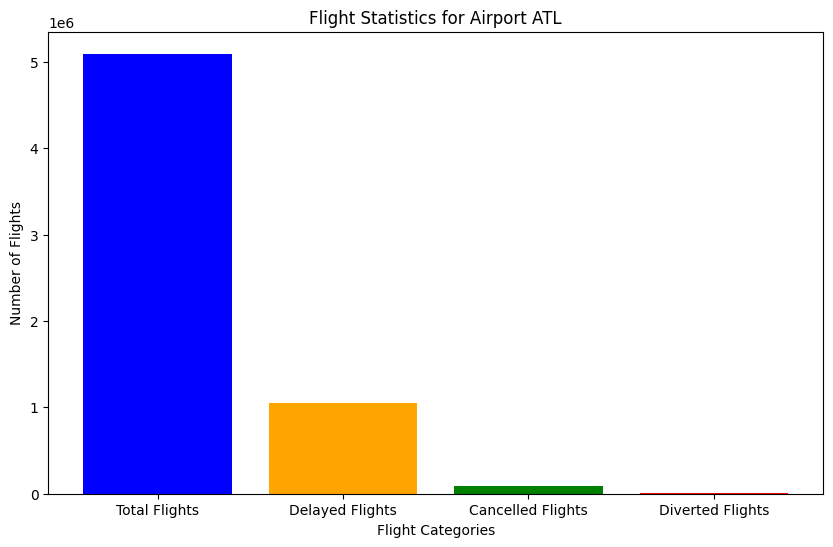

In [52]:
# Filter the dataset for a specific airport (e.g., ATL)
airport_df = df[df['Airport.Code'] == 'ATL']

# Calculate statistics for the selected airport
total_flights = airport_df['Statistics.Flights.Total'].sum()
delayed_flights = airport_df['Statistics.Flights.Delayed'].sum()
cancelled_flights = airport_df['Statistics.Flights.Cancelled'].sum()
diverted_flights = airport_df['Statistics.Flights.Diverted'].sum()

# Create lists for plotting
categories = ['Total Flights', 'Delayed Flights', 'Cancelled Flights', 'Diverted Flights']
counts = [total_flights, delayed_flights, cancelled_flights, diverted_flights]

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Flight Categories')
plt.ylabel('Number of Flights')
plt.title('Flight Statistics for Airport ATL')
plt.show()


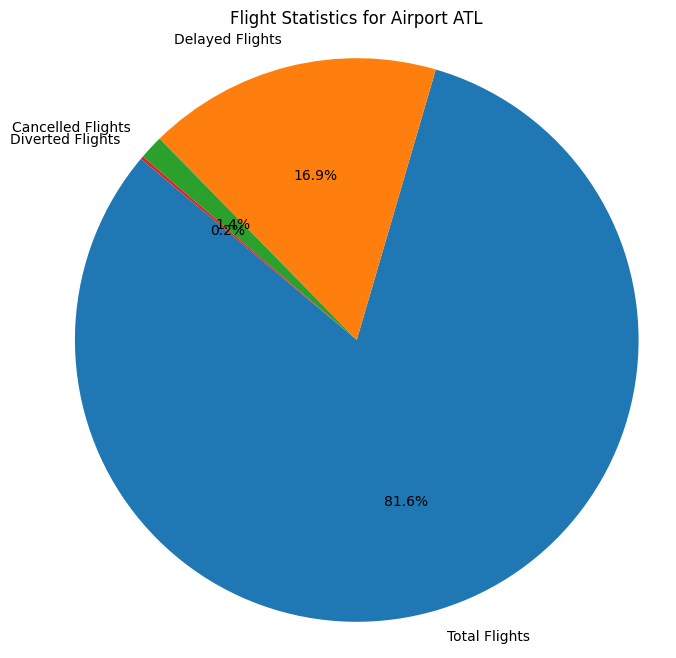

In [53]:
total_count = total_flights + delayed_flights + cancelled_flights + diverted_flights
percentages = [total_flights / total_count * 100,
               delayed_flights / total_count * 100,
               cancelled_flights / total_count * 100,
               diverted_flights / total_count * 100]

# Create labels
labels = ['Total Flights', 'Delayed Flights', 'Cancelled Flights', 'Diverted Flights']

# Plot the data
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Flight Statistics for Airport ATL')
plt.show()

/var/folders/x6/sc1l9n8n0p1g5x042tlggs6h0000gn/T/ipykernel_14697/524653603.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  groupATL_df = airport_df.groupby(pd.Grouper(key='Time.Label', freq='M')).agg({


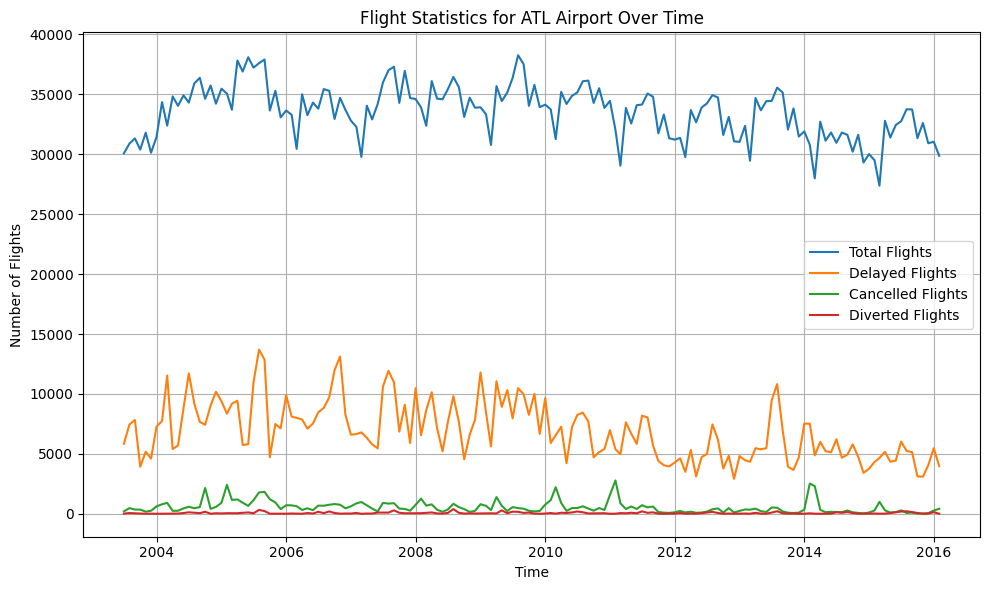

In [55]:
groupATL_df = airport_df.groupby(pd.Grouper(key='Time.Label', freq='M')).agg({
    'Statistics.Flights.Total': 'sum',
    'Statistics.Flights.Delayed': 'sum',
    'Statistics.Flights.Cancelled': 'sum',
    'Statistics.Flights.Diverted': 'sum'
}).reset_index()

plt.figure(figsize=(10, 6))
plt.plot(groupATL_df['Time.Label'], groupATL_df['Statistics.Flights.Total'], label='Total Flights')
plt.plot(groupATL_df['Time.Label'], groupATL_df['Statistics.Flights.Delayed'], label='Delayed Flights')
plt.plot(groupATL_df['Time.Label'], groupATL_df['Statistics.Flights.Cancelled'], label='Cancelled Flights')
plt.plot(groupATL_df['Time.Label'], groupATL_df['Statistics.Flights.Diverted'], label='Diverted Flights')
plt.xlabel('Time')
plt.ylabel('Number of Flights')
plt.title('Flight Statistics for ATL Airport Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

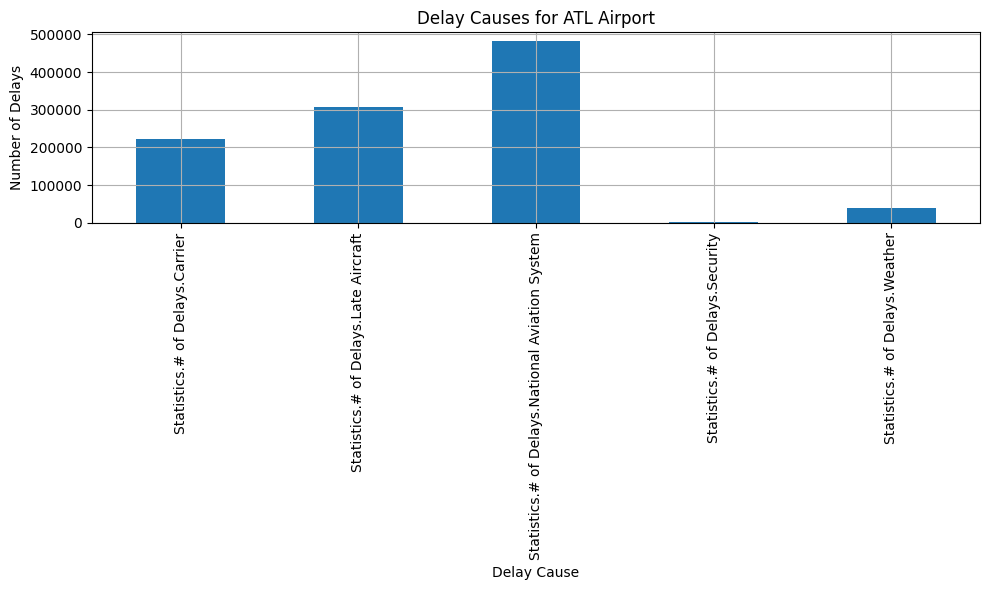

In [56]:
delay_causes = ['Statistics.# of Delays.Carrier', 
                'Statistics.# of Delays.Late Aircraft', 
                'Statistics.# of Delays.National Aviation System', 
                'Statistics.# of Delays.Security', 
                'Statistics.# of Delays.Weather']
total_delays = airport_df[delay_causes].sum()
plt.figure(figsize=(10, 6))
total_delays.plot(kind='bar')
plt.xlabel('Delay Cause')
plt.ylabel('Number of Delays')
plt.title('Delay Causes for ATL Airport')
plt.grid(True)
plt.tight_layout()
plt.show()

Thank you NAS 
And turns out ATL has a very efficient security 

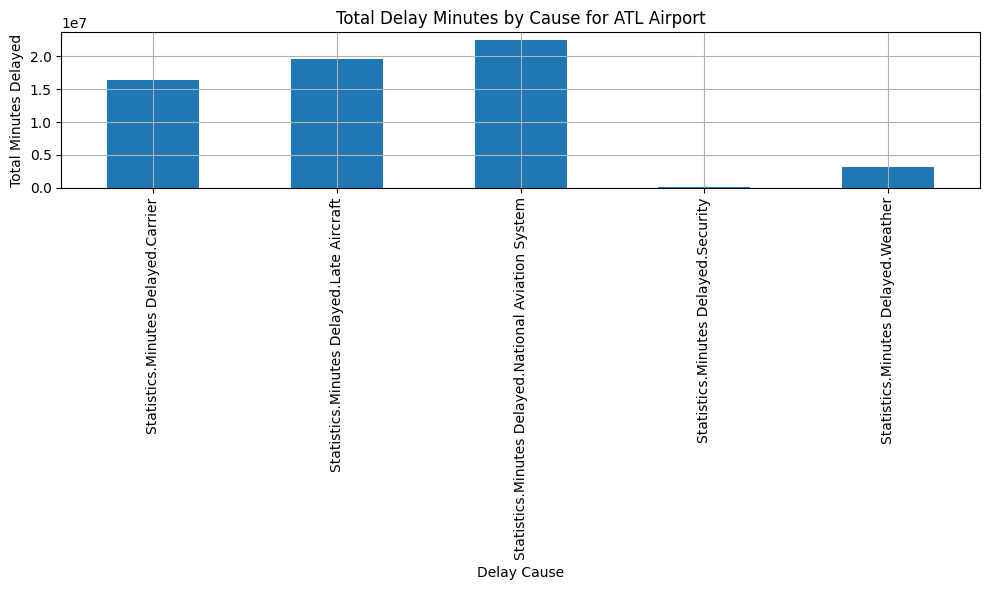

In [57]:
delay_minutes = ['Statistics.Minutes Delayed.Carrier', 
                 'Statistics.Minutes Delayed.Late Aircraft', 
                 'Statistics.Minutes Delayed.National Aviation System', 
                 'Statistics.Minutes Delayed.Security', 
                 'Statistics.Minutes Delayed.Weather']

total_delay_minutes = airport_df[delay_minutes].sum()
plt.figure(figsize=(10, 6))
total_delay_minutes.plot(kind='bar')
plt.xlabel('Delay Cause')
plt.ylabel('Total Minutes Delayed')
plt.title('Total Delay Minutes by Cause for ATL Airport')
plt.grid(True)
plt.tight_layout()
plt.show()

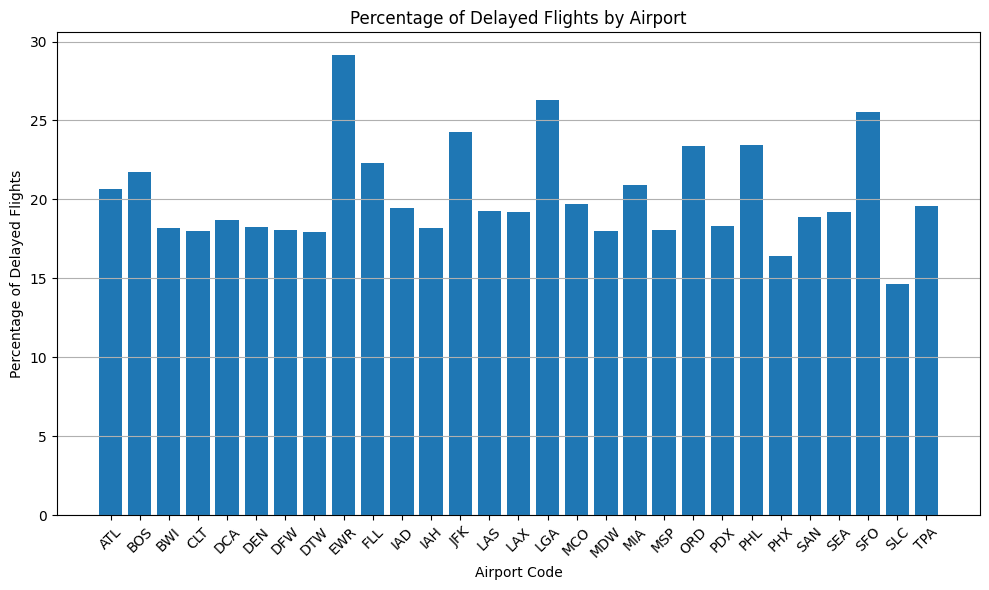

In [62]:
group_airportstat = df.groupby('Airport.Code').agg({
    'Statistics.Flights.Total': 'sum',
    'Statistics.Flights.Delayed': 'sum'
})

# Calculate the percentage of delayed flights for each airport
group_airportstat['Percentage Delayed'] = (group_airportstat['Statistics.Flights.Delayed'] / group_airportstat['Statistics.Flights.Total']) * 100

# Convert MultiIndex to single-level index
group_airportstat.reset_index(inplace=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(group_airportstat['Airport.Code'], group_airportstat['Percentage Delayed'])
plt.xlabel('Airport Code')
plt.ylabel('Percentage of Delayed Flights')
plt.title('Percentage of Delayed Flights by Airport')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Part 1 Classification Algorithm 

We can predict where a flight is from 

We are first doing some encoding to the airport code which is in a label format 

I did not know how to deal with the carrier names column, so only for this time , i have omitted it 

In [66]:

from sklearn.preprocessing import LabelEncoder

# Instantiate the LabelEncoder
label_encoder = LabelEncoder()

# Create a new column for label encoded values
df['Airport_Code_LabelEncoded'] = label_encoder.fit_transform(df['Airport.Code'])


In [ ]:
df['Year'] = pd.to_datetime(df['Time.Label']).dt.year
df['Month'] = pd.to_datetime(df['Time.Label']).dt.month
df.drop(columns=['Time.Label'], inplace=True)


In [90]:
df

,Airport.Code,Statistics.# of Delays.Carrier,Statistics.# of Delays.Late Aircraft,Statistics.# of Delays.National Aviation System,Statistics.# of Delays.Security,Statistics.# of Delays.Weather,Statistics.Carriers.Names,Statistics.Carriers.Total,Statistics.Flights.Cancelled,Statistics.Flights.Delayed,...,Statistics.Flights.Total,Statistics.Minutes Delayed.Carrier,Statistics.Minutes Delayed.Late Aircraft,Statistics.Minutes Delayed.National Aviation System,Statistics.Minutes Delayed.Security,Statistics.Minutes Delayed.Total,Statistics.Minutes Delayed.Weather,Airport_Code_LabelEncoded,Year,Month
0,ATL,1009,1275,3217,17,328,[Unknown],11,216,5843,...,30060,61606,68335,118831,518,268764,19474,0,2003,6
1,BOS,374,495,685,3,66,[Unknown],14,138,1623,...,9639,20319,28189,24400,99,77167,4160,1,2003,6
2,BWI,296,477,389,8,78,[Unknown],11,29,1245,...,8287,13635,26810,17556,278,64480,6201,2,2003,6
3,CLT,300,472,735,2,54,[Unknown],11,73,1562,...,8670,14763,23379,23804,127,65865,3792,3,2003,6
4,DCA,283,268,487,4,58,[Unknown],13,74,1100,...,6513,13775,13712,20999,120,52747,4141,4,2003,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4403,SAN,280,397,171,2,20,[Unknown],11,97,871,...,6016,15482,23023,6021,79,46206,1601,24,2016,1
4404,SEA,357,513,351,2,50,[Unknown],10,104,1274,...,9739,25461,32693,11466,73,74017,4324,25,2016,1
4405,SFO,560,947,2194,2,119,[Unknown],10,449,3825,...,13206,43641,72557,153416,66,278610,8930,26,2016,1
4406,SLC,338,540,253,3,38,[Unknown],8,84,1175,...,8699,32066,33682,8057,57,76978,3116,27,2016,1


In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [91]:
X = df.drop(columns=['Airport.Code', 'Statistics.Carriers.Names'])
y = df['Airport_Code_LabelEncoded']  # Target Variable

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [93]:
classifier = RandomForestClassifier()


classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9909297052154195


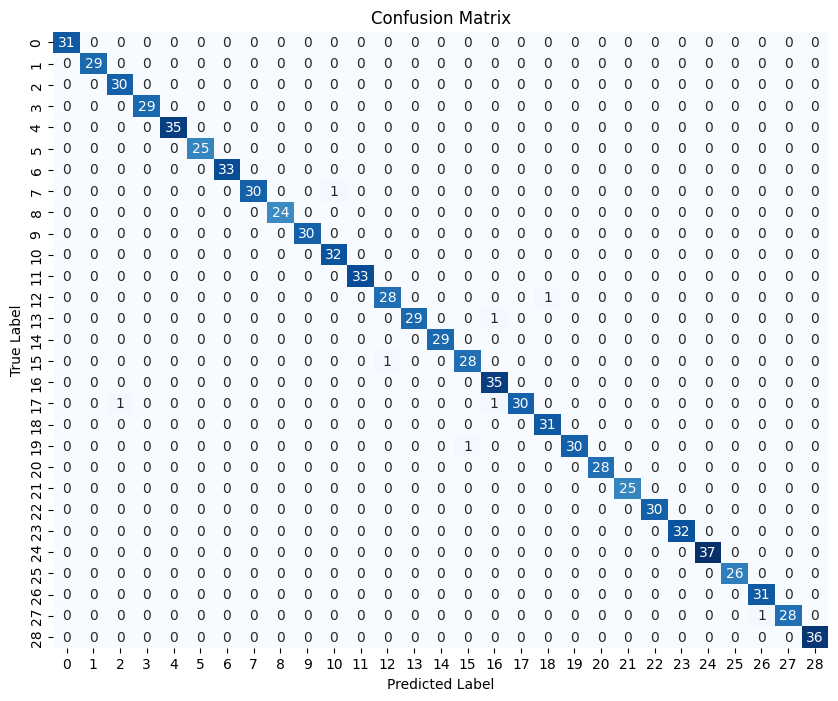

In [95]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



In [97]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precision: 0.9911940693910739
Recall: 0.9909297052154195
F1-score: 0.990922496382562


# Part 2 Regression 
Our aim here will be to predict the total number of minutes delayed in a year 

In [98]:
print(X.columns)

Index(['Statistics.# of Delays.Carrier',
       'Statistics.# of Delays.Late Aircraft',
       'Statistics.# of Delays.National Aviation System',
       'Statistics.# of Delays.Security', 'Statistics.# of Delays.Weather',
       'Statistics.Carriers.Total', 'Statistics.Flights.Cancelled',
       'Statistics.Flights.Delayed', 'Statistics.Flights.Diverted',
       'Statistics.Flights.On Time', 'Statistics.Flights.Total',
       'Statistics.Minutes Delayed.Carrier',
       'Statistics.Minutes Delayed.Late Aircraft',
       'Statistics.Minutes Delayed.National Aviation System',
       'Statistics.Minutes Delayed.Security',
       'Statistics.Minutes Delayed.Total',
       'Statistics.Minutes Delayed.Weather', 'Airport_Code_LabelEncoded',
       'Year', 'Month'],
      dtype='object')


In [100]:
X

,Statistics.# of Delays.Carrier,Statistics.# of Delays.Late Aircraft,Statistics.# of Delays.National Aviation System,Statistics.# of Delays.Security,Statistics.# of Delays.Weather,Statistics.Carriers.Total,Statistics.Flights.Cancelled,Statistics.Flights.Delayed,Statistics.Flights.Diverted,Statistics.Flights.On Time,Statistics.Flights.Total,Statistics.Minutes Delayed.Carrier,Statistics.Minutes Delayed.Late Aircraft,Statistics.Minutes Delayed.National Aviation System,Statistics.Minutes Delayed.Security,Statistics.Minutes Delayed.Total,Statistics.Minutes Delayed.Weather,Airport_Code_LabelEncoded,Year,Month
0,1009,1275,3217,17,328,11,216,5843,27,23974,30060,61606,68335,118831,518,268764,19474,0,2003,6
1,374,495,685,3,66,14,138,1623,3,7875,9639,20319,28189,24400,99,77167,4160,1,2003,6
2,296,477,389,8,78,11,29,1245,15,6998,8287,13635,26810,17556,278,64480,6201,2,2003,6
3,300,472,735,2,54,11,73,1562,14,7021,8670,14763,23379,23804,127,65865,3792,3,2003,6
4,283,268,487,4,58,13,74,1100,18,5321,6513,13775,13712,20999,120,52747,4141,4,2003,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4403,280,397,171,2,20,11,97,871,18,5030,6016,15482,23023,6021,79,46206,1601,24,2016,1
4404,357,513,351,2,50,10,104,1274,31,8330,9739,25461,32693,11466,73,74017,4324,25,2016,1
4405,560,947,2194,2,119,10,449,3825,20,8912,13206,43641,72557,153416,66,278610,8930,26,2016,1
4406,338,540,253,3,38,8,84,1175,14,7426,8699,32066,33682,8057,57,76978,3116,27,2016,1


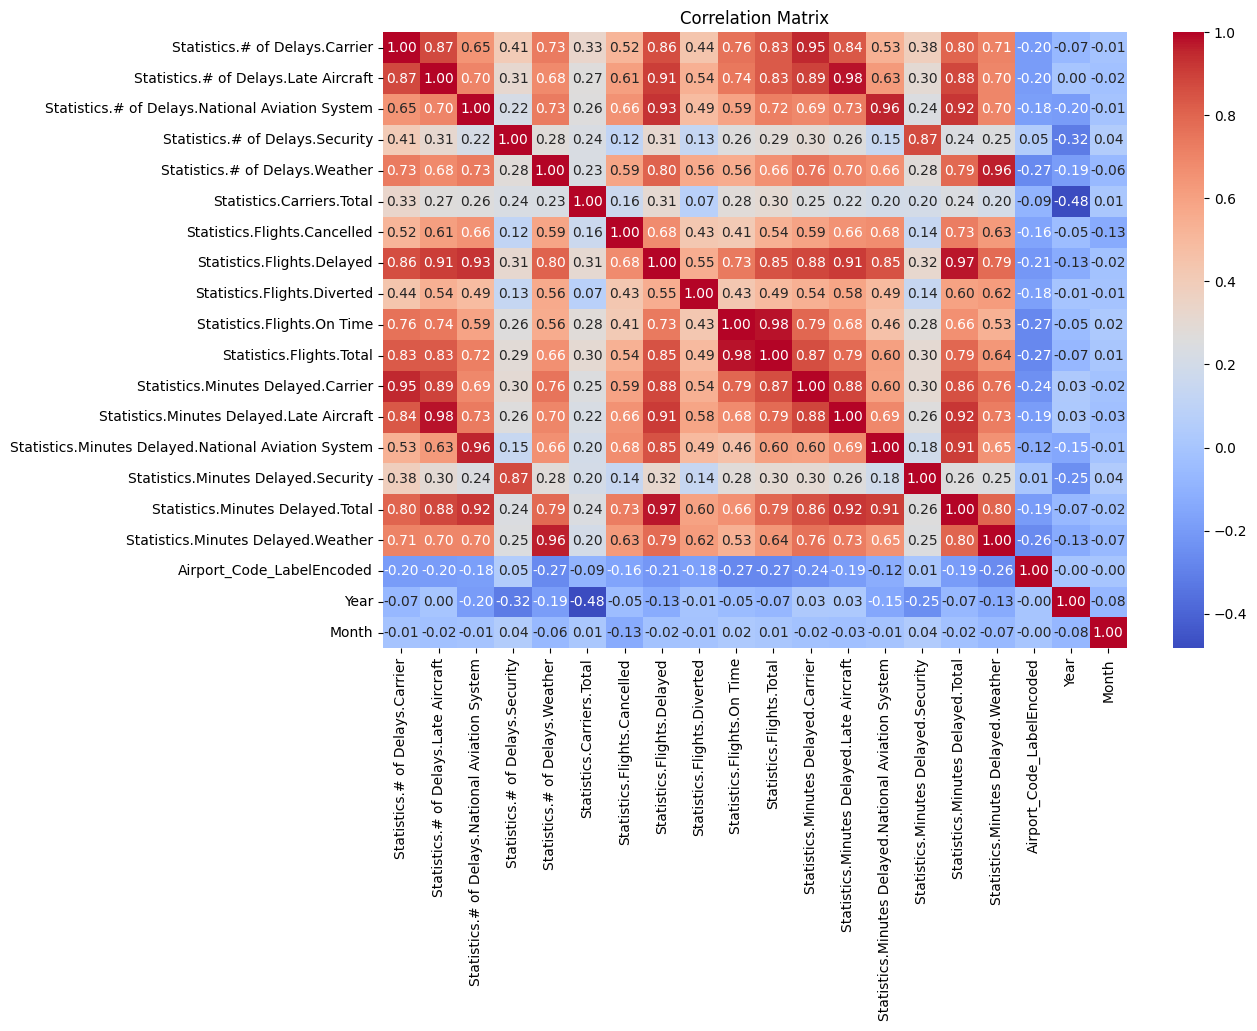

In [103]:
# Select only numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['number'])

# Calculate correlation matrix
corr_matrix = numeric_columns.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [121]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


X_reg = df.drop(columns=['Statistics.Minutes Delayed.Total', 'Airport.Code', 'Statistics.Carriers.Names'])

y_reg = df['Statistics.Minutes Delayed.Total']


In [124]:

# Split the data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)


In [125]:
# Initialize the linear regression model
regressor = LinearRegression()


In [126]:

# Fit the model on the training data
regressor.fit(X_train_reg, y_train_reg)


LinearRegression()

In [127]:

# Predict on the testing data
y_pred_reg = regressor.predict(X_test_reg)

# Calculate the Mean Squared Error (MSE)
mse_reg = mean_squared_error(y_test_reg, y_pred_reg)
print("Mean Squared Error:", mse_reg)


Mean Squared Error: 0.12405512655442506


# Part 3 PCA and Clustering 

We will be doing K means clustering in the following steps , however as we have a lot of features , i have decided to do the dimensionality reduction in this step

Explained Variance Ratio: [0.53897926 0.10090276 0.06565674]


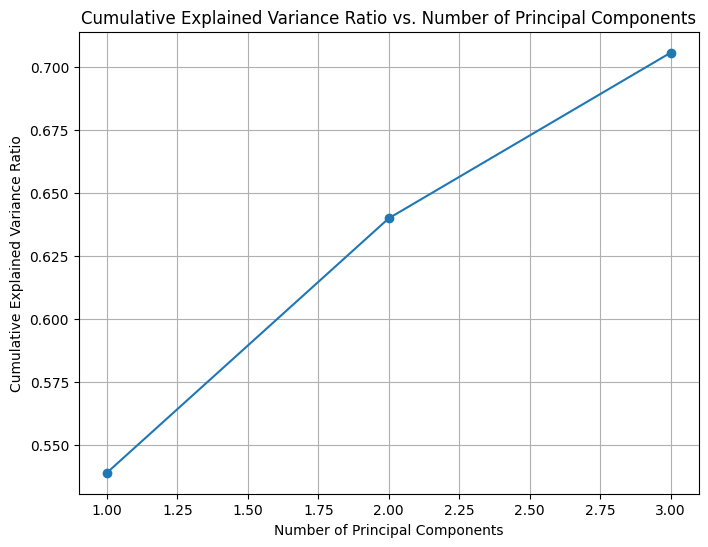

In [129]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features by scaling them to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize PCA with the desired number of components (e.g., 3)
n_components = 3
pca = PCA(n_components=n_components)

# Fit PCA to the scaled data and transform the data onto the new principal components
X_pca = pca.fit_transform(X_scaled)

# Variance explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Plot the cumulative explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, n_components + 1), explained_variance_ratio.cumsum(), marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Principal Components')
plt.grid(True)
plt.show()

# Select the first three principal components as new features
X_pca_selected = X_pca[:, :3]


In [130]:
from sklearn.cluster import KMeans

# Specify the number of clusters (K)
num_clusters = 3

# Initialize KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit KMeans model to the transformed data
kmeans.fit(X_pca)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Get cluster centroids
cluster_centers = kmeans.cluster_centers_


In [131]:
# Count the number of data points in each cluster
cluster_sizes = np.bincount(cluster_labels)

# Print the size of each cluster
for i, size in enumerate(cluster_sizes):
    print(f"Cluster {i}: {size} data points")

Cluster 0: 290 data points
Cluster 1: 1303 data points
Cluster 2: 2815 data points


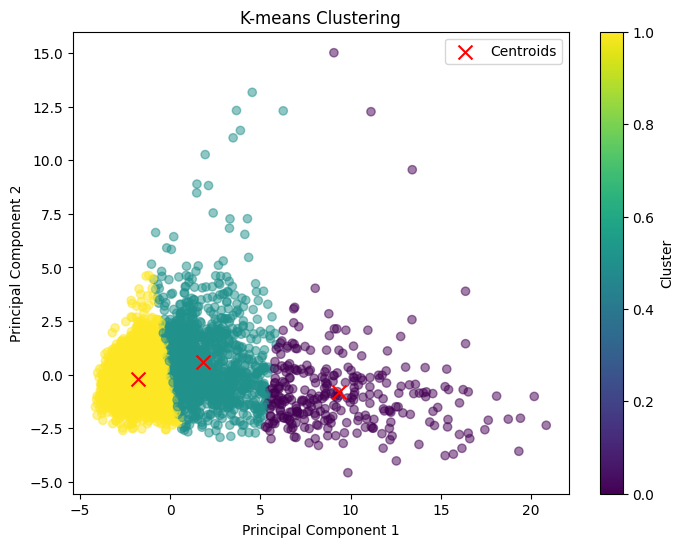

In [132]:

# Scatter plot of the data points colored by cluster
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', c='red', s=100, label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.colorbar(label='Cluster')
plt.show()


# Part 4 Ensemble Learning 
As done in the lectures, i am going to do adaboost 

In [140]:
ada_classifier = RandomForestClassifier()


ada_classifier.fit(X_train, y_train)


y_pred_adaboost =ada_classifier.predict(X_test)
accuracy_ada = accuracy_score(y_test, y_pred_adaboost)
print("Accuracy:", accuracy_ada)


Accuracy: 0.9863945578231292


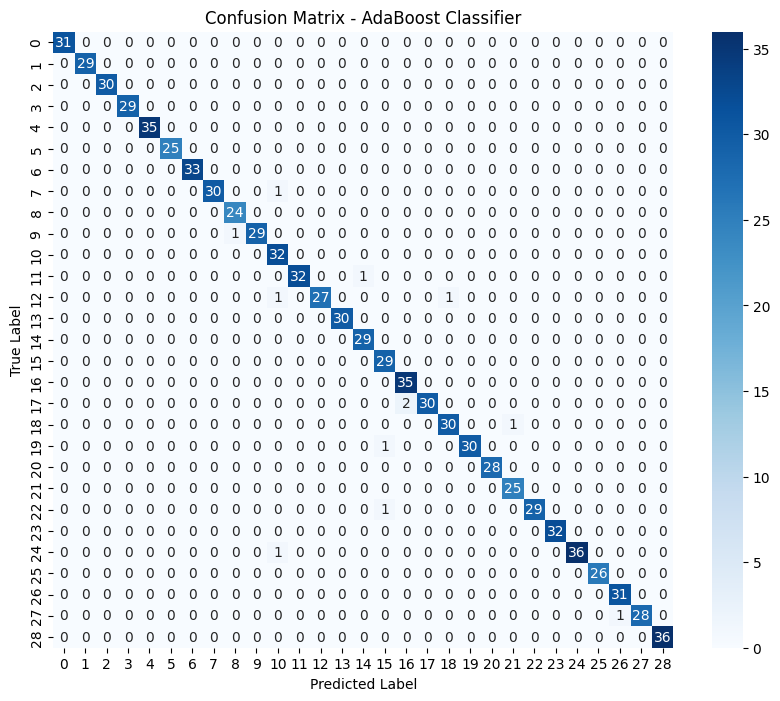

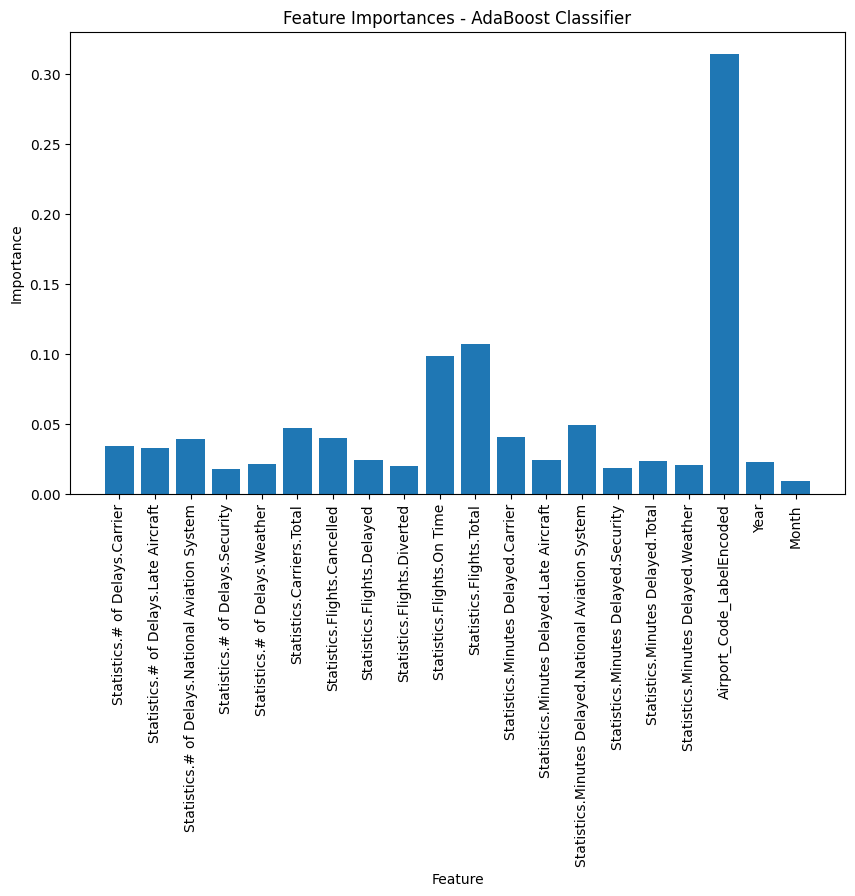

In [141]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred_adaboost), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - AdaBoost Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot feature importances
feature_importances = ada_classifier.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances, tick_label=X.columns)
plt.title('Feature Importances - AdaBoost Classifier')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()
